# Objetivo 1) Parseando datos de proteínas en Swiss-Prot (Uniprot)

In [1]:
pip install Biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Acceder a secuencias proteicas de SwissProt como objetos SeqRecord
from Bio import ExPASy
from Bio import SeqIO
#definimos una variable con el código de la proteína de interés
UniProtID = "O23729"
#la pasamos al handle (variable temporal de manejo) para descargar registro
with ExPASy.get_sprot_raw(UniProtID) as handle:
    seq_record = SeqIO.read(handle, "swiss")
#extraer los atributos del registro
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])  

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE', ProteinAlphabet())
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


Ejercicio 1a) Acceso SeqRecords Uniprot/Swissprot

In [3]:
#El ID Q43088 pertenece a Ribulose-1,5 bisphosphate carboxylase/oxygenase large subunit N-methyltransferase, chloroplastic
from Bio import ExPASy
from Bio import SeqIO

UniProtID = "Q43088"
with ExPASy.get_sprot_raw(UniProtID) as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"]) 

Q43088
RBCMT_PEA
RecName: Full=Ribulose-1,5 bisphosphate carboxylase/oxygenase large subunit N-methyltransferase, chloroplastic; EC=2.1.1.127; AltName: Full=[Fructose-bisphosphate aldolase]-lysine N-methyltransferase; EC=2.1.1.259; AltName: Full=[Ribulose-bisphosphate carboxylase]-lysine N-methyltransferase; Short=PsLSMT; Short=RuBisCO LSMT; Short=RuBisCO methyltransferase; Short=rbcMT; Flags: Precursor;
Seq('MATIFSGGSVSPFLFHTNKGTSFTPKAPILHLKRSFSAKSVASVGTEPSLSPAV...KFF', ProteinAlphabet())
Length 489
['3D-structure', 'Chloroplast', 'Direct protein sequencing', 'Methyltransferase', 'Plastid', 'S-adenosyl-L-methionine', 'Transferase', 'Transit peptide']


In [4]:
#seq_record.seq del ID P02144 da la sequencia de la mioglobina
from Bio import ExPASy
from Bio import SeqIO

UniProtID = "P02144"
with ExPASy.get_sprot_raw(UniProtID) as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"]) 

P02144
MYG_HUMAN
RecName: Full=Myoglobin;
Seq('MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSED...FQG', ProteinAlphabet())
Length 154
['3D-structure', 'Direct protein sequencing', 'Heme', 'Iron', 'Metal-binding', 'Muscle protein', 'Oxygen transport', 'Phosphoprotein', 'Polymorphism', 'Reference proteome', 'Transport']


In [5]:
#función que automatice el código con el UniProt ID como parámetro
def uni_id(UniProtID):
    from Bio import ExPASy
    from Bio import SeqIO
    with ExPASy.get_sprot_raw(UniProtID) as handle:
        seq_record = SeqIO.read(handle, "swiss")
    print(seq_record.id)
    print(seq_record.name)
    print(seq_record.description)
    print(repr(seq_record.seq))
    print("Length %i" % len(seq_record))
    print(seq_record.annotations["keywords"])

uni_id("Q43088")

Q43088
RBCMT_PEA
RecName: Full=Ribulose-1,5 bisphosphate carboxylase/oxygenase large subunit N-methyltransferase, chloroplastic; EC=2.1.1.127; AltName: Full=[Fructose-bisphosphate aldolase]-lysine N-methyltransferase; EC=2.1.1.259; AltName: Full=[Ribulose-bisphosphate carboxylase]-lysine N-methyltransferase; Short=PsLSMT; Short=RuBisCO LSMT; Short=RuBisCO methyltransferase; Short=rbcMT; Flags: Precursor;
Seq('MATIFSGGSVSPFLFHTNKGTSFTPKAPILHLKRSFSAKSVASVGTEPSLSPAV...KFF', ProteinAlphabet())
Length 489
['3D-structure', 'Chloroplast', 'Direct protein sequencing', 'Methyltransferase', 'Plastid', 'S-adenosyl-L-methionine', 'Transferase', 'Transit peptide']


Ejercicio 1b) Parseo de registro completo

In [6]:
handle = open("Q43088.txt")
#Leemos el archivo con biopython como récord de SwissProt
from Bio import SwissProt
record = SwissProt.read(handle)
handle.close()

In [7]:
#imprimir en pantalla info sobre las referencias disponibles en el registro seleccionado
print(record.description)
for ref in record.references:
    print("authors:", ref.authors)
    print("title:", ref.title)
print(record.organism_classification)
print(record.entry_name)

RecName: Full=Ribulose-1,5 bisphosphate carboxylase/oxygenase large subunit N-methyltransferase, chloroplastic; EC=2.1.1.127; AltName: Full=[Fructose-bisphosphate aldolase]-lysine N-methyltransferase; EC=2.1.1.259; AltName: Full=[Ribulose-bisphosphate carboxylase]-lysine N-methyltransferase; Short=PsLSMT; Short=RuBisCO LSMT; Short=RuBisCO methyltransferase; Short=rbcMT; Flags: Precursor;
authors: Klein R.R., Houtz R.L.
title: Cloning and developmental expression of pea ribulose-1,5-bisphosphate carboxylase/oxygenase large subunit N-methyltransferase.
authors: Trievel R.C., Beach B.M., Dirk L.M., Houtz R.L., Hurley J.H.
title: Structure and catalytic mechanism of a SET domain protein methyltransferase.
authors: Trievel R.C., Flynn E.M., Houtz R.L., Hurley J.H.
title: Mechanism of multiple lysine methylation by the SET domain enzyme Rubisco LSMT.
authors: Couture J.F., Hauk G., Thompson M.J., Blackburn G.M., Trievel R.C.
title: Catalytic roles for carbon-oxygen hydrogen bonding in SET do

In [8]:
#descargamos todos los registros curados correspondientes a mioglobinas de un montón de especies en un solo archivo "uniprot-myoglobins.txt"
#lo cargamos en un handle 
from Bio import SwissProt
handle = open("uniprot-myoglobins.txt")
#iterar por los registros
descriptions=[record.description for record in SwissProt.parse(handle)]
handle.close()
#Cuántos registros hay?
print(len(descriptions))
#Veamos algunos ejemplos
print(descriptions[:5])


176
['RecName: Full=Myoglobin;', 'RecName: Full=Myoglobin;', 'RecName: Full=Myoglobin;', 'RecName: Full=Myoglobin;', 'RecName: Full=Myoglobin;']


Escriba un código similar al que usaron recién, para crear un diccionario cuyo valor sea el largo de las proteínas y el valor la cantidad.


In [9]:
proteins= open("Mbs.txt")
lengths = [record.sequence_length for record in SwissProt.parse(proteins)]
dic_lengths= {i: lengths.count(i) for i in lengths}
proteins.close()
dic_lengths

{154: 102,
 147: 21,
 378: 2,
 148: 1,
 117: 1,
 153: 2,
 146: 7,
 22: 1,
 96: 1,
 149: 5,
 4660: 2,
 121: 2,
 890: 1,
 118: 1,
 132: 1,
 500: 1,
 141: 1,
 390: 2,
 4655: 1,
 144: 1,
 109: 1,
 432: 1,
 4652: 1,
 151: 3,
 395: 2,
 145: 2,
 45: 1,
 513: 1,
 174: 1,
 261: 1,
 489: 1,
 3623: 1,
 143: 1,
 157: 1,
 719: 1,
 733: 1}

Ejercicio 1c) Utilizando los registros

In [10]:
#"organism_classification" devuelve una lista con todos los taxones a los cuales pertenece la especie del registro
#Cargamos los linajes de los organismos a los cuales pertenecen las proteinas en cuestión. record.organism_clasification
#es una lista, lo ponemos dentro de una lista mas grande.

handle = open("Mbs.txt")
linages = [record.organism_classification for record in SwissProt.parse(handle)]
handle.close()

from collections import Counter, OrderedDict

def common_linage(linages, alpha=0.8):
    #Devuelve la parte del linaje que es común al menos a una proporción alpha de los organismos contenidos en 
    #los registros ingresados
    
    #Listamos todos los elementos que hay en los records, y contamos cuántas veces aparecen
    taxons = [taxon for record in linages for taxon in record]
    print(taxons)
    #Counter devuelve un diccionario con el número de veces que cada elemento aparece en la lista ingresada
    counts = Counter(taxons)
    print(counts)
    #OrderedDict (llamado de esta forma) devuelve un set ordenado de elementos únicos (los taxones)
    taxons = OrderedDict.fromkeys(taxons)
    print(taxons)
    #Nos quedamos sólo con aquellos taxones comunes al menos a una proporción alfa de las proteinas iniciales
    common_linage = [taxon for taxon in taxons if counts[taxon] >= alpha*len(linages)]
   

    #Devolvemos los elementos comunes
    return common_linage

print(common_linage(linages, alpha=0.8))

#Con alpha 1 el resultado es una lista vacia [], porque debería cumplir con todos los taxones.



['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo', 'Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Glires', 'Rodentia', 'Myomorpha', 'Muroidea', 'Muridae', 'Murinae', 'Mus', 'Mus', 'Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Glires', 'Rodentia', 'Myomorpha', 'Muroidea', 'Muridae', 'Murinae', 'Rattus', 'Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Laurasiatheria', 'Cetartiodactyla', 'Ruminantia', 'Pecora', 'Bovidae', 'Bovinae', 'Bos', 'Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Laurasiatheria', 'Cetartiodactyla', 'Ruminantia', 'Pecora', 'Bovidae', 'Bovinae', 'Bubalus', 'Eukaryota', 'Metazoa

Ejercicio 1d) Atributos de la Secuencia Proteica


In [11]:
from collections import defaultdict

handle = open("Mbs.txt")

#carga la lista de “Features” del Registro en la lista features
#metodo naive
features=[]
for record in SwissProt.parse(handle):
    for i in record.features:
        features.append(i)
print(len(features))
handle.close()

#Otras dos formas de hacerlo:
# 1) por concatenación de listas
handle= open("Mbs.txt")
features2=[]
for record in SwissProt.parse(handle):
  features2 += record.features
print(len(features2))
handle.close

# 2) por list comprehension
handle= open("Mbs.txt")
features3= []
features3= [feature for record in SwissProt.parse(handle) for feature in record.features]
print(len(features3))
print(features3)
handle.close


#También se puede cargar la lista de  secuencias del Registro en la lista seqs

seqs=[]

for record in SwissProt.parse(handle):
    seqs.append(record.sequence)
handle.close()



2711
2711
2711
[FeatureTable(FeatureLocation(ExactPosition(0), ExactPosition(1)), type='INIT_MET'), FeatureTable(FeatureLocation(ExactPosition(1), ExactPosition(154)), type='CHAIN', id='PRO_0000053303'), FeatureTable(FeatureLocation(ExactPosition(64), ExactPosition(65)), type='METAL'), FeatureTable(FeatureLocation(ExactPosition(93), ExactPosition(94)), type='METAL'), FeatureTable(FeatureLocation(ExactPosition(3), ExactPosition(4)), type='MOD_RES'), FeatureTable(FeatureLocation(ExactPosition(67), ExactPosition(68)), type='MOD_RES'), FeatureTable(FeatureLocation(ExactPosition(54), ExactPosition(55)), type='VARIANT', id='VAR_003180'), FeatureTable(FeatureLocation(ExactPosition(133), ExactPosition(134)), type='VARIANT', id='VAR_003181'), FeatureTable(FeatureLocation(ExactPosition(139), ExactPosition(140)), type='VARIANT', id='VAR_003182'), FeatureTable(FeatureLocation(ExactPosition(139), ExactPosition(140)), type='VARIANT', id='VAR_003183'), FeatureTable(FeatureLocation(ExactPosition(105),

In [12]:
handle = open("Mbs.txt")
# cargar la lista de features del record por list comprehension
features4= []
features4= [feature for record in SwissProt.parse(handle) for feature in record.features]
handle.close        
from collections import defaultdict 

def que_features(features):
    #devuelve un diccionario con atributos de la secuencia para modificaciones y otro
    #para estructura
    #creamos los diccionarios
    modificaciones_dict = defaultdict(list)
    estructura_dict = defaultdict(list)
    #lista de modificaciones post-transduccionales    
    modificaciones = ['INIT_MET','METAL','MOD_RES','NON_TER','NP_BIND','PROPEP']
    #lista de motivos estructurales
    estructura = ['CHAIN','HELIX','LOOP', 'SHEET', 'TURN','ACT_SITE','COILED','BINDING','STRAND','TURN']
    
    for feature in features:
        if feature.type in modificaciones:
            modificaciones_dict[feature.type].append([feature.location.start.position, feature.location.end.position, feature.type])
        elif feature.type in estructura:
            estructura_dict[feature.type].append([feature.location.start.position, feature.location.end.position, feature.type])
    
    return '....modificaciones postransduccionales...', modificaciones_dict,'.....elementos estructurales.....', estructura_dict

def variantes (features):
    #devuelve un diccionario con las variantes de la secuencia
    variantes_dict = defaultdict(list)
    for feature in features:
        if feature.type == 'VARIANT':
            variantes_dict[feature.type].append([feature.location.start.position, feature.location.end.position, feature.id])
    
    return '....variantes....', variantes_dict

print(que_features(features4))
print(variantes(features4))

('....modificaciones postransduccionales...', defaultdict(<class 'list'>, {'INIT_MET': [[0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT_MET'], [0, 1, 'INIT

# Objetivo 2: Parsear gnomAD y ClinVar

Ejercicio 2a) Obtención de los datos

In [13]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Ejercicio 2a:  Reduzca el framework de gnomAD (hoy con 50 columnas) a sólo las siguientes:
'Chromosome', 'Position', 'rsID', 'Reference', 'Alternate', 'Transcript Consequence', 'Annotation', 'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count'.
Calcule, en base al significado de cada columna según la página de gnomAD, usted mismo la frecuencia alélica y compárela con la reportada en la columna correspondiente.
¿cuántas variantes caen en intrón y cuántas en exón?
Haga los histogramas de frecuencia para cada una de las categorías que figuran en “Annotation”. Analice los resultados.




In [14]:
import pandas as pd
import numpy as np
BRCA1_gnomAD = pd.read_csv('gnomAD.csv')
BRCA1_gnomAD.head(5)


,Chromosome,Position,rsID,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Consequence,Protein Consequence,...,Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
0,17,41197628,rs754327493,C,T,gnomAD Exomes,PASS,NaN,c.*67G>A,NaN,...,0,0,0,6054,0,0,2,30292,0,0
1,17,41197632,rs539044217,G,A,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,c.*63C>T,NaN,...,0,0,0,7152,0,0,0,30394,0,0
2,17,41197635,rs778988967,A,G,gnomAD Exomes,PASS,NaN,c.*60T>C,NaN,...,0,0,0,6074,0,0,0,30404,0,0
3,17,41197637,rs137892861,G,A,gnomAD Exomes,PASS,NaN,c.*58C>T,NaN,...,0,0,0,6076,0,0,0,30460,0,0
4,17,41197637,rs137892861,G,T,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,c.*58C>A,NaN,...,0,0,0,7162,0,0,0,30460,0,0


In [15]:
BRCA1_gnomAD.columns

Index(['Chromosome', 'Position', 'rsID', 'Reference', 'Alternate', 'Source',
       'Filters - exomes', 'Filters - genomes', 'Consequence',
       'Protein Consequence', 'Transcript Consequence', 'Annotation', 'Flags',
       'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count',
       'Hemizygote Count', 'Allele Count African', 'Allele Number African',
       'Homozygote Count African', 'Hemizygote Count African',
       'Allele Count Latino', 'Allele Number Latino',
       'Homozygote Count Latino', 'Hemizygote Count Latino',
       'Allele Count Ashkenazi Jewish', 'Allele Number Ashkenazi Jewish',
       'Homozygote Count Ashkenazi Jewish',
       'Hemizygote Count Ashkenazi Jewish', 'Allele Count East Asian',
       'Allele Number East Asian', 'Homozygote Count East Asian',
       'Hemizygote Count East Asian', 'Allele Count European (Finnish)',
       'Allele Number European (Finnish)',
       'Homozygote Count European (Finnish)',
       'Hemizygote Count Europ

In [16]:
BRCA1_gnomAD[['rsID','Source']]

,rsID,Source
0,rs754327493,gnomAD Exomes
1,rs539044217,"gnomAD Exomes,gnomAD Genomes"
2,rs778988967,gnomAD Exomes
3,rs137892861,gnomAD Exomes
4,rs137892861,"gnomAD Exomes,gnomAD Genomes"
...,...,...
2262,rs904265019,gnomAD Exomes
2263,rs1172227698,gnomAD Exomes
2264,rs746485760,gnomAD Exomes
2265,rs770368390,gnomAD Exomes


In [17]:
#reducimos el framework de gnomAD
BRCA1_gnomAD_selec = BRCA1_gnomAD[['Chromosome', 'Position', 'rsID', 'Reference', 'Alternate', 'Transcript Consequence', 'Annotation', 'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count']]

BRCA1_gnomAD_selec

,Chromosome,Position,rsID,Reference,Alternate,Transcript Consequence,Annotation,Allele Count,Allele Number,Allele Frequency,Homozygote Count
0,17,41197628,rs754327493,C,T,c.*67G>A,3_prime_UTR_variant,3,248254,0.000012,0
1,17,41197632,rs539044217,G,A,c.*63C>T,3_prime_UTR_variant,2,280716,0.000007,0
2,17,41197635,rs778988967,A,G,c.*60T>C,3_prime_UTR_variant,1,249792,0.000004,0
3,17,41197637,rs137892861,G,A,c.*58C>T,3_prime_UTR_variant,2,250006,0.000008,0
4,17,41197637,rs137892861,G,T,c.*58C>A,3_prime_UTR_variant,2,281410,0.000007,0
...,...,...,...,...,...,...,...,...,...,...,...
2262,17,41277260,rs904265019,C,T,c.-81G>A,5_prime_UTR_variant,1,130502,0.000008,0
2263,17,41277261,rs1172227698,C,T,c.-82G>A,5_prime_UTR_variant,1,130560,0.000008,0
2264,17,41277262,rs746485760,C,A,c.-83G>T,5_prime_UTR_variant,1,130556,0.000008,0
2265,17,41277275,rs770368390,G,A,c.-96C>T,5_prime_UTR_variant,7,130632,0.000054,0


In [18]:
#Calculo de la frecuencia alélica y compárela con la reportada en la columna correspondiente.

BRCA1_gnomAD['frecuencia alelica']=BRCA1_gnomAD['Allele Count']/BRCA1_gnomAD['Allele Number']

#compación con la reportada en la columna correspondiente
BRCA1_gnomAD[['frecuencia alelica','Allele Frequency']]


,frecuencia alelica,Allele Frequency
0,0.000012,0.000012
1,0.000007,0.000007
2,0.000004,0.000004
3,0.000008,0.000008
4,0.000007,0.000007
...,...,...
2262,0.000008,0.000008
2263,0.000008,0.000008
2264,0.000008,0.000008
2265,0.000054,0.000054


In [19]:
#¿cuántas variantes caen en intrón y cuántas en exón?

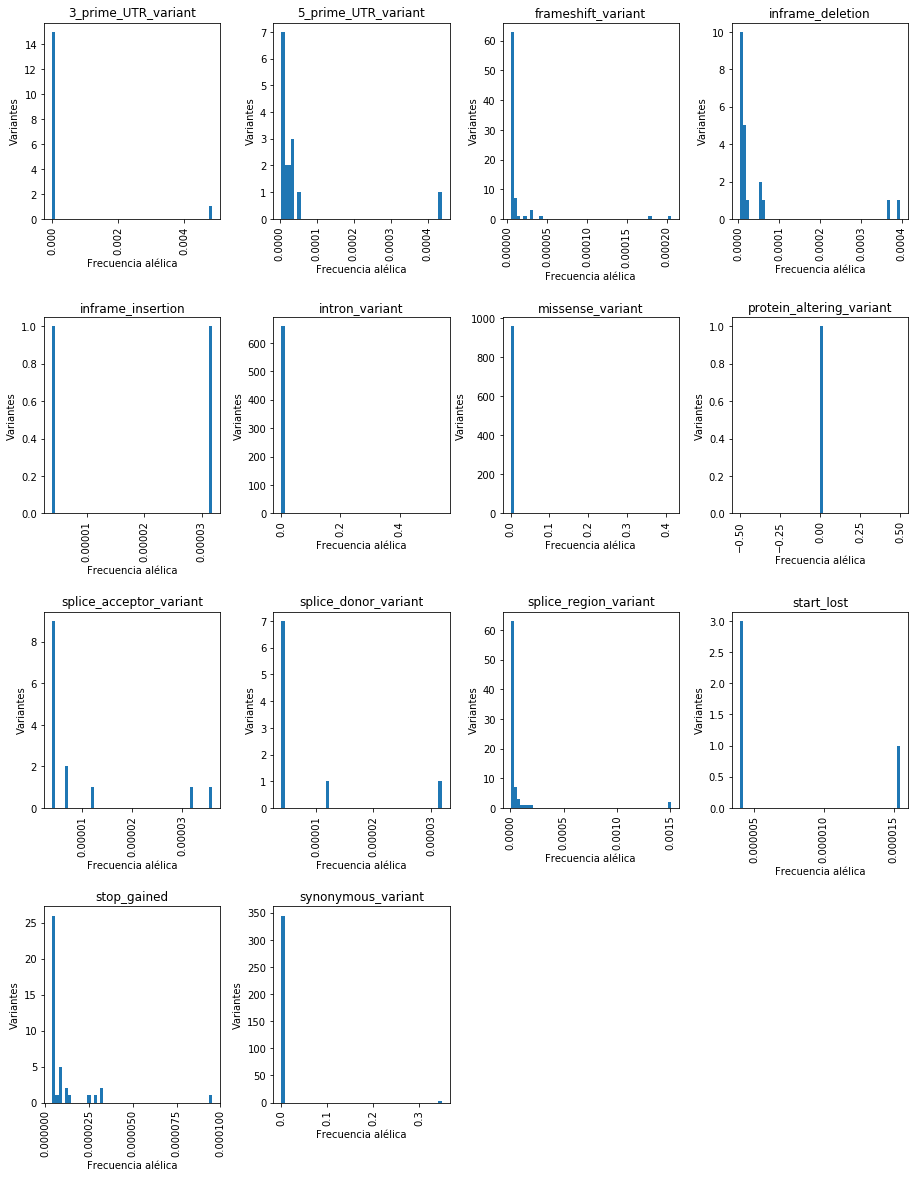

In [20]:
#Haga los histogramas de frecuencia para cada una de las categorías que figuran en “Annotation"

histograma = BRCA1_gnomAD['Allele Frequency'].hist (by=BRCA1_gnomAD['Annotation'], bins = 50, figsize = (15,20))
for ax in histograma.flatten():
    ax.set_ylabel("Variantes")
    ax.set_xlabel("Frecuencia alélica")

In [21]:
#Bajar el archivo de ClinVar y cargarlo a pandas
#ClinVar está separado por tabulaciones '\t'
BRCA1_ClinVar = pd.read_csv('clinvar_result.txt', sep="\t")
BRCA1_ClinVar.head()

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,GRCh38/hg38 17q23.1-25.1(chr17:36449220-750531...,CCDC103|RPRML|LINC02210|LINC00974|C17orf98|LIN...,NaN,See cases,"Pathogenic(Last reviewed: Apr 21, 2011)",no assertion criteria provided,VCV000148363,17,57595736 - 73049225,17,36449220 - 75053130,148363,158114,NaN,NaN,NaN
1,GRCh38/hg38 17q21.33-24.2(chr17:36449220-68170...,SP2|STAT3|HOXB3|HOXB4|STAT5A|STAT5B|DUSP3|ERBB...,NaN,See cases,"Pathogenic(Last reviewed: Aug 12, 2011)","criteria provided, single submitter",VCV000057282,17,48563237 - 65936105,17,36449220 - 68170214,57282,71877,NaN,NaN,NaN
2,GRCh38/hg38 17q12-21.31(chr17:39199873-4562957...,ACLY|AOC2|ARL4D|ATP6V0A1|BRCA1|FMNL1|CDC6|CCR7...,NaN,See cases,"Pathogenic(Last reviewed: Aug 12, 2011)","criteria provided, single submitter",VCV000058696,17,37356126 - 43706945,17,39199873 - 45629579,58696,73291,NaN,NaN,NaN
3,NG_005905.2:g.(?_92501)_(135581_1441370)del(;)...,RND2|LOC110485084|LOC111589215|LOC111589216|BRCA1,NaN,NaN,"Pathogenic(Last reviewed: Oct 2, 2015)","criteria provided, single submitter",VCV000373888,17|17,41176312 - 41277500,17|17,43024295 - 43125483,373888,360749|360754,NaN,NaN,NaN
4,NG_005905.2:g.(?_92501)_(135581_1441370)del,BRCA1|RND2|LOC110485084|LOC111589215|LOC111589216,NaN,"Breast-ovarian cancer, familial 1","Pathogenic(Last reviewed: Oct 2, 2015)","criteria provided, single submitter",VCV000373863,17,41176312 - 41277500,17,43024295 - 43125483,373863,360749,NaN,NaN,NaN


In [22]:
# Limpieza del dataframe

# Remover ultima columna, la unnamed (hay un tab extra en el header)
BRCA1_ClinVar = BRCA1_ClinVar.drop(columns=["Unnamed: 15"])

# Remover aquellos registros que tengan dbSNP ID como NaN
BRCA1_ClinVar = BRCA1_ClinVar.dropna(subset=["dbSNP ID"])

BRCA1_ClinVar.head()


,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI
6,NM_007294.3(BRCA1):c.*6207C>T,BRCA1,NaN,"Breast-ovarian cancer, familial 1","Benign(Last reviewed: Jan 12, 2015)",reviewed by expert panel,VCV000209219,17,41191488,17,43039471,209219,206177,rs78603756,NC_000017.11:43039470:G:A
7,NM_007294.3(BRCA1):c.*5860C>T,BRCA1,NaN,"Breast-ovarian cancer, familial 1","Benign(Last reviewed: Jan 12, 2015)",reviewed by expert panel,VCV000209220,17,41191835,17,43039818,209220,206178,rs150356989,NC_000017.11:43039817:G:A
8,NM_007294.3(BRCA1):c.*5678_*5679insAT,BRCA1,NaN,"Breast-ovarian cancer, familial 1","Benign(Last reviewed: Jan 12, 2015)",reviewed by expert panel,VCV000209221,17,41192016 - 41192017,17,43039999 - 43040000,209221,206179,rs35578914,NC_000017.11:43039999:ATATA:ATATATA
9,NM_007294.3(BRCA1):c.*5513G>A,BRCA1,NaN,"Breast-ovarian cancer, familial 1","Benign(Last reviewed: Jan 12, 2015)",reviewed by expert panel,VCV000209222,17,41192182,17,43040165,209222,206180,rs112222971,NC_000017.11:43040164:C:T
10,NM_007294.3(BRCA1):c.*4549G>C,BRCA1,NaN,"Breast-ovarian cancer, familial 1","Benign(Last reviewed: Jan 12, 2015)",reviewed by expert panel,VCV000209223,17,41193146,17,43041129,209223,206181,rs138528005,NC_000017.11:43041128:C:G


Ejercicio 2b) Integrado de ambos registros

In [23]:
#Vamos a unificarlos con respecto a rsID, que en ClinVar tiene otro nombre.
BRCA1_ClinVar.rename(columns={'dbSNP ID':'rsID'}, inplace=True)
#Hacemos el merge pasando los dos df + la columna que vamos a usar
BRCA1_merged = pd.merge(BRCA1_gnomAD, BRCA1_ClinVar, on='rsID')
#Seleccionamos por último sólo algunas columnas de interés
BRCA1_merged = BRCA1_merged[['rsID','Chromosome','Position','Reference','Alternate','Protein change','Clinical significance (Last reviewed)','Condition(s)',
       'Consequence', 'Allele Frequency']]

BRCA1_merged.sample(10)

,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency
495,rs373686790,17,41226388,G,A,NaN,"Likely benign(Last reviewed: Jun 29, 2017)",not specified|not provided|Hereditary cancer-p...,p.His1566His,0.000018
452,rs1246456207,17,41223233,A,G,NaN,"Uncertain significance(Last reviewed: Aug 31, ...",not provided,p.Ser1587Ser,0.000004
1432,rs755706172,17,41245601,C,T,NaN,"Likely benign(Last reviewed: Jun 29, 2017)",Hereditary cancer-predisposing syndrome|Breast...,p.Glu649Glu,0.000004
778,rs80357440,17,41243655,G,A,"S1298*, S1251*","Pathogenic(Last reviewed: Sep 8, 2016)",not provided|Pancreatic cancer 4|FANCONI ANEMI...,p.Ser1298Leu,0.000007
1418,rs80356895,17,41245542,A,G,"M669T, M622T",Conflicting interpretations of pathogenicity(L...,"Breast-ovarian cancer, familial 1|not specifie...",p.Met669Thr,0.000050
1482,rs80357220,17,41245729,T,C,"K607*, K560*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Lys607Glu,0.000004
1246,rs751656678,17,41245045,G,A,"H835Y, H788Y","Uncertain significance(Last reviewed: Oct 2, 2...",Hereditary breast and ovarian cancer syndrome|...,p.His835Tyr,0.000007
690,rs80358072,17,41243060,A,G,NaN,Conflicting interpretations of pathogenicity(L...,not provided|not specified,c.4097-11T>C,0.000004
387,rs80357656,17,41223039,C,T,"S1652fs, S1631fs, S527fs, S1584fs","Pathogenic(Last reviewed: Oct 18, 2016)","Breast-ovarian cancer, familial 1",p.Ser1652Asn,0.000008
1331,rs80356884,17,41245280,C,G,"R756S, R709S",Conflicting interpretations of pathogenicity(L...,Hereditary cancer-predisposing syndrome|Heredi...,p.Arg756Ser,0.000014


In [24]:
#El objetivo es obtener (de acuerdo a ClinVar) las variantes “patogenicas”. Primero
#recorremos las que tengan significancia clinica 
filas=[]
count=0
for i in list(BRCA1_merged["Clinical significance (Last reviewed)"]): 
    if i.startswith("Pathogenic"):
        filas.append(count)
    count=count+1
BRCA1_path=BRCA1_merged.loc[filas,:]
BRCA1_path


,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency
22,rs397509295,17,41197746,G,C,"C1847*, C1800*, C1868*, C743*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1|Hereditary b...",p.Cys1868Trp,0.000004
30,rs80356873,17,41197751,G,T,"Q1846*, Q1867*, Q1799*, Q742*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Gln1867Lys,0.000032
41,rs80356942,17,41197781,C,T,"E1836*, E732*, E1857*, E1789*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Glu1857Lys,0.000008
47,rs41293465,17,41197784,G,A,"R1835*, R1856*, R1788*, R731*","Pathogenic(Last reviewed: Apr 22, 2016)",not provided|Breast and/or ovarian cancer|Brea...,p.Arg1856Ter,0.000012
49,rs80357268,17,41197790,C,T,"V1833M, V1854M, V729M, V1786M",Pathogenic/Likely pathogenic(Last reviewed: Fe...,"Breast-ovarian cancer, familial 1|Hereditary b...",p.Val1854Met,0.000004
...,...,...,...,...,...,...,...,...,...,...
2135,rs80358127,17,41267805,G,C,NaN,"Pathogenic(Last reviewed: Jun 18, 2019)",Hereditary cancer-predisposing syndrome|Heredi...,c.81-9C>G,0.000004
2174,rs80357410,17,41276044,ACT,A,C24R,Pathogenic/Likely pathogenic(Last reviewed: Ma...,Hereditary breast and ovarian cancer syndrome|...,p.Glu23ValfsTer17,0.000205
2175,rs397509309,17,41276045,C,T,C24fs,"Pathogenic(Last reviewed: Oct 18, 2016)","Breast-ovarian cancer, familial 1",p.Glu23Glu,0.000008
2176,rs80357783,17,41276047,C,G,E23fs,"Pathogenic(Last reviewed: Apr 22, 2016)",Hereditary cancer-predisposing syndrome|Neopla...,p.Glu23Gln,0.000004


In [25]:
#En lugar de usar el comando loc para generar el nuevo df lo podemos hacer por list comprehensions
BRCA1_path = BRCA1_merged[BRCA1_merged["Clinical significance (Last reviewed)"].str.startswith("Pathogenic")]
BRCA1_path

,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency
22,rs397509295,17,41197746,G,C,"C1847*, C1800*, C1868*, C743*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1|Hereditary b...",p.Cys1868Trp,0.000004
30,rs80356873,17,41197751,G,T,"Q1846*, Q1867*, Q1799*, Q742*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Gln1867Lys,0.000032
41,rs80356942,17,41197781,C,T,"E1836*, E732*, E1857*, E1789*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Glu1857Lys,0.000008
47,rs41293465,17,41197784,G,A,"R1835*, R1856*, R1788*, R731*","Pathogenic(Last reviewed: Apr 22, 2016)",not provided|Breast and/or ovarian cancer|Brea...,p.Arg1856Ter,0.000012
49,rs80357268,17,41197790,C,T,"V1833M, V1854M, V729M, V1786M",Pathogenic/Likely pathogenic(Last reviewed: Fe...,"Breast-ovarian cancer, familial 1|Hereditary b...",p.Val1854Met,0.000004
...,...,...,...,...,...,...,...,...,...,...
2135,rs80358127,17,41267805,G,C,NaN,"Pathogenic(Last reviewed: Jun 18, 2019)",Hereditary cancer-predisposing syndrome|Heredi...,c.81-9C>G,0.000004
2174,rs80357410,17,41276044,ACT,A,C24R,Pathogenic/Likely pathogenic(Last reviewed: Ma...,Hereditary breast and ovarian cancer syndrome|...,p.Glu23ValfsTer17,0.000205
2175,rs397509309,17,41276045,C,T,C24fs,"Pathogenic(Last reviewed: Oct 18, 2016)","Breast-ovarian cancer, familial 1",p.Glu23Glu,0.000008
2176,rs80357783,17,41276047,C,G,E23fs,"Pathogenic(Last reviewed: Apr 22, 2016)",Hereditary cancer-predisposing syndrome|Neopla...,p.Glu23Gln,0.000004


Ejercicio 2b) A partir del dataframe combinado de Clinvar y gnomAD construya los histogramas de frecuencias para diferentes clasificaciones clínicas de las variantes. (Nota: para la frecuencia utilice escala logarítmica)

In [26]:
# Valores unicos en la columna de clinical significance
BRCA1_merged["Clinical significance (Last reviewed)"].value_counts()

Likely benign(Last reviewed: Jun 29, 2017)                                   294
Pathogenic(Last reviewed: Sep 8, 2016)                                       136
Benign(Last reviewed: Aug 10, 2015)                                          108
Conflicting interpretations of pathogenicity(Last reviewed: Dec 31, 2019)     96
Benign(Last reviewed: Jun 18, 2019)                                           68
                                                                            ... 
Likely benign(Last reviewed: Aug 22, 2017)                                     1
Likely benign(Last reviewed: Apr 3, 2017)                                      1
Uncertain significance(Last reviewed: Jan 1, 2000)                             1
Uncertain significance(Last reviewed: Dec 31, 2014)                            1
Uncertain significance(Last reviewed: Oct 20, 2019)                            1
Name: Clinical significance (Last reviewed), Length: 794, dtype: int64

In [27]:
# Dado que el campo Clinical Significance esta "sucio" porque trae concatenada la fecha
# de last reviewed, creo una nueva columna derivada que tenga solamente los
# siguientes terminos para las categorias:
# Pathogenic, Likely Pathogenic, Benign, Likely Benign, Conflicting, Uncertain

BRCA1_merged["ClinSig"] = "Uncertain"
BRCA1_merged.loc[BRCA1_merged["Clinical significance (Last reviewed)"].str.contains("Benign"), "ClinSig"] = "Benign"
BRCA1_merged.loc[BRCA1_merged["Clinical significance (Last reviewed)"].str.contains("Likely benign"), "ClinSig"] = "Likely Benign"
BRCA1_merged.loc[BRCA1_merged["Clinical significance (Last reviewed)"].str.contains("Likely pathogenic"), "ClinSig"] = "Likely Pathogenic"
BRCA1_merged.loc[BRCA1_merged["Clinical significance (Last reviewed)"].str.contains("Pathogenic"), "ClinSig"] = "Pathogenic"
BRCA1_merged.loc[BRCA1_merged["Clinical significance (Last reviewed)"].str.contains("Conflicting"), "ClinSig"] = "Conflicting"
BRCA1_merged

,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency,ClinSig
0,rs137892861,17,41197637,G,A,NaN,"Uncertain significance(Last reviewed: May 28, ...",Hereditary breast and ovarian cancer syndrome|...,c.*58C>T,0.000008,Uncertain
1,rs137892861,17,41197637,G,T,NaN,"Uncertain significance(Last reviewed: May 28, ...",Hereditary breast and ovarian cancer syndrome|...,c.*58C>A,0.000007,Uncertain
2,rs3092995,17,41197659,G,A,NaN,"Benign(Last reviewed: Jan 12, 2015)","not specified|Breast-ovarian cancer, familial ...",c.*36C>T,0.000004,Benign
3,rs3092995,17,41197659,G,C,NaN,"Benign(Last reviewed: Jan 12, 2015)","not specified|Breast-ovarian cancer, familial ...",c.*36C>G,0.004847,Benign
4,rs375042815,17,41197675,G,A,NaN,"Benign/Likely benign(Last reviewed: Nov 10, 2017)",not specified|Hereditary cancer-predisposing s...,c.*20C>T,0.000020,Likely Benign
...,...,...,...,...,...,...,...,...,...,...,...
2216,rs772215665,17,41277233,C,T,NaN,"Likely benign(Last reviewed: Jul 29, 2016)","Breast-ovarian cancer, familial 1",c.-54G>A,0.000023,Likely Benign
2217,rs904265019,17,41277260,C,T,NaN,"Likely benign(Last reviewed: May 28, 2019)","Breast-ovarian cancer, familial 1",c.-81G>A,0.000008,Likely Benign
2218,rs770368390,17,41277275,G,A,NaN,"Likely benign(Last reviewed: Apr 16, 2018)",not provided,c.-96C>T,0.000054,Likely Benign
2219,rs770368390,17,41277275,G,A,NaN,Conflicting interpretations of pathogenicity(L...,"Breast-ovarian cancer, familial 1|Hereditary b...",c.-96C>T,0.000054,Conflicting


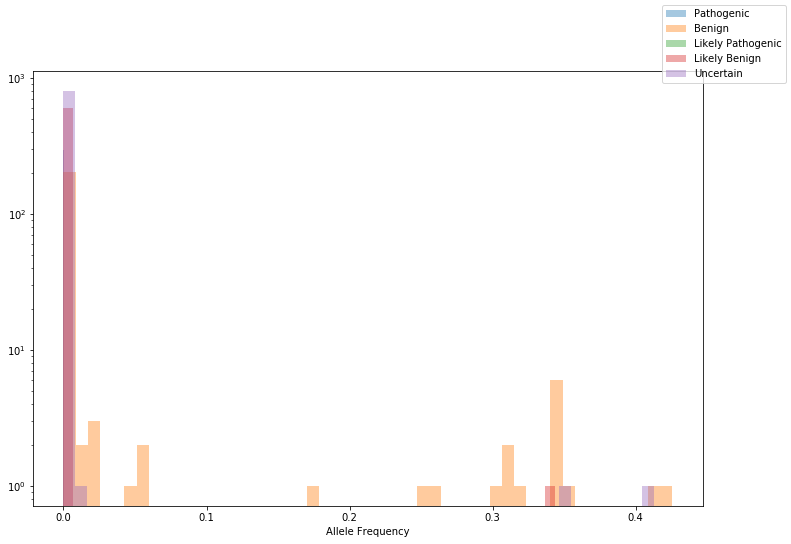

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

bins = 50
sns.distplot(BRCA1_merged.loc[BRCA1_merged["ClinSig"] == "Pathogenic"]['Allele Frequency'], bins=bins, kde=False, ax=ax)
sns.distplot(BRCA1_merged.loc[BRCA1_merged["ClinSig"] == "Benign"]['Allele Frequency'], bins=bins, kde=False, ax=ax)
sns.distplot(BRCA1_merged.loc[BRCA1_merged["ClinSig"] == "Likely Pathogenic"]['Allele Frequency'], bins=bins, kde=False, ax=ax)
sns.distplot(BRCA1_merged.loc[BRCA1_merged["ClinSig"] == "Likely Benign"]['Allele Frequency'], bins=bins, kde=False, ax=ax)
sns.distplot(BRCA1_merged.loc[BRCA1_merged["ClinSig"] == "Uncertain"]['Allele Frequency'], bins=bins, kde=False, ax=ax)

fig.legend(labels=["Pathogenic", "Benign", "Likely Pathogenic", "Likely Benign", "Uncertain"])
ax.set_yscale('log')

2c) Mapeo de las variantes patogénicas a motivos estructurales


Ejercicio 2c) Escriba un código que a partir de los registros de Uniprot/SwissProt y Clinvar permita determinar para cada variante su pertenencia (o no) a algún motivo estructural/modificación post-traduccional y agregue esta info como una columna adicional al dataframe de pandas.

In [29]:
handle = ExPASy.get_sprot_raw("P38398")
features = [feature for record in SwissProt.parse(handle) for feature in record.features]

In [30]:
def get_pos_feature(features, pos):
  # get_pos_feature recibe una lista de features de un objeto record de SwissProt
  # y una posicion pos. Devuelve una lista de todas los feature tags cuyo
  # start position y end position incluyan en su rango a pos.
  fs = []
  for feature in features:
    start = feature.location.start.position
    end = feature.location.end.position

    if pos > start and pos <= end:
      fs.append(feature.type)
  
  return fs

get_pos_feature(features, 1)

['CHAIN', 'MOD_RES', 'VAR_SEQ', 'VAR_SEQ']

In [31]:
def get_pos_feature_notes(features, pos):
  # lo mismo que get_pos_feature, pero devolviendo una lista de anotaciones
  # correspondientes a las features de la pos
  fs = []
  for feature in features:
    start = feature.location.start.position
    end = feature.location.end.position

    if pos > start and pos <= end:
      if "note" in feature.qualifiers:
        fs.append(feature.qualifiers["note"])
      else:
        fs.append("")
  
  return fs

get_pos_feature_notes(features, 1)

['Breast cancer type 1 susceptibility protein',
 'N-acetylmethionine',
 'Missing (in isoform 8)',
 'Missing (in isoform 4)']

In [32]:
import re

# Me quedo con todas las variantes cuya consecuencia sea una sustitucion en la proteina, las que empiezan con p.
BRCA1_p = BRCA1_merged.loc[BRCA1_merged["Consequence"].str.startswith("p.")]
BRCA1_p = BRCA1_p[~BRCA1_p.Consequence.isnull()]

BRCA1_p['Protein position'] = BRCA1_p.Consequence.apply(lambda x: re.findall('\d+',x)[0])

# En una columna nueva aplico las dos funciones anteriores usando la posicion extraida
BRCA1_p['Position features'] = BRCA1_p.apply(lambda x: get_pos_feature(features, int(x["Protein position"])), axis=1)
BRCA1_p['Position features notes'] = BRCA1_p.apply(lambda x: get_pos_feature_notes(features, int(x["Protein position"])), axis=1)

# Todas las variantes del merged
BRCA1_p[["rsID", "ClinSig", "Protein change", "Condition(s)", "Consequence", "Position features", "Position features notes"]]

,rsID,ClinSig,Protein change,Condition(s),Consequence,Position features,Position features notes
6,rs763740623,Uncertain,"Y1863D, Y759D, Y1816D, Y1884D",not provided|Hereditary cancer-predisposing sy...,p.Tyr1884Asn,[],[]
7,rs774127304,Likely Benign,NaN,"Breast-ovarian cancer, familial 1|not provided...",p.His1883His,[],[]
8,rs80357183,Uncertain,"H1862R, H758R, H1815R, H1883R",Hereditary breast and ovarian cancer syndrome,p.His1883Leu,[],[]
9,rs80357183,Uncertain,"H1862L, H1815L, H1883L, H758L",Hereditary breast and ovarian cancer syndrome|...,p.His1883Leu,[],[]
10,rs775417240,Uncertain,NaN,"Breast-ovarian cancer, familial 1|Hereditary b...",p.Gln1878_Pro1880del,[],[]
...,...,...,...,...,...,...,...
2195,rs1339036647,Likely Benign,NaN,Hereditary breast and ovarian cancer syndrome|...,p.Ala5Ala,"[CHAIN, VAR_SEQ, VAR_SEQ, HELIX]","[Breast cancer type 1 susceptibility protein, ..."
2196,rs1335137805,Uncertain,A5V,Hereditary breast and ovarian cancer syndrome|...,p.Ala5Val,"[CHAIN, VAR_SEQ, VAR_SEQ, HELIX]","[Breast cancer type 1 susceptibility protein, ..."
2197,rs780157871,Likely Benign,NaN,"not provided|Breast-ovarian cancer, familial 1",p.Leu3Leu,"[CHAIN, VAR_SEQ, VAR_SEQ, HELIX]","[Breast cancer type 1 susceptibility protein, ..."
2198,rs780157871,Uncertain,L3F,Hereditary breast and ovarian cancer syndrome|...,p.Leu3Leu,"[CHAIN, VAR_SEQ, VAR_SEQ, HELIX]","[Breast cancer type 1 susceptibility protein, ..."


In [33]:
# Solo las patogenicas
BRCA1_p.loc[BRCA1_p["ClinSig"] == "Pathogenic"][["rsID", "ClinSig", "Protein change", "Condition(s)", "Consequence", "Position features", "Position features notes"]]

,rsID,ClinSig,Protein change,Condition(s),Consequence,Position features,Position features notes
22,rs397509295,Pathogenic,"C1847*, C1800*, C1868*, C743*","Breast-ovarian cancer, familial 1|Hereditary b...",p.Cys1868Trp,[],[]
30,rs80356873,Pathogenic,"Q1846*, Q1867*, Q1799*, Q742*","Breast-ovarian cancer, familial 1",p.Gln1867Lys,[],[]
41,rs80356942,Pathogenic,"E1836*, E732*, E1857*, E1789*","Breast-ovarian cancer, familial 1",p.Glu1857Lys,"[CHAIN, VAR_SEQ, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
47,rs41293465,Pathogenic,"R1835*, R1856*, R1788*, R731*",not provided|Breast and/or ovarian cancer|Brea...,p.Arg1856Ter,"[CHAIN, VAR_SEQ, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
49,rs80357268,Pathogenic,"V1833M, V1854M, V729M, V1786M","Breast-ovarian cancer, familial 1|Hereditary b...",p.Val1854Met,"[CHAIN, DOMAIN, VAR_SEQ, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
...,...,...,...,...,...,...,...
2119,rs80357498,Pathogenic,C39Y,Neoplasm of the breast|Hereditary breast and o...,p.Cys39Tyr,"[CHAIN, ZN_FING, VAR_SEQ]","[Breast cancer type 1 susceptibility protein, ..."
2174,rs80357410,Pathogenic,C24R,Hereditary breast and ovarian cancer syndrome|...,p.Glu23ValfsTer17,"[CHAIN, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
2175,rs397509309,Pathogenic,C24fs,"Breast-ovarian cancer, familial 1",p.Glu23Glu,"[CHAIN, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
2176,rs80357783,Pathogenic,E23fs,Hereditary cancer-predisposing syndrome|Neopla...,p.Glu23Gln,"[CHAIN, VAR_SEQ, VARIANT]","[Breast cancer type 1 susceptibility protein, ..."
